In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # for the train the model and predict the result
from sklearn.preprocessing import StandardScaler # for normalize the data
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score # for the accuracy of our model

In [8]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                27 non-null     int64
 1   brought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [9]:
x = data.iloc[:,2:4] # independent variable
y = data.iloc[:,4] #    dependent variable

In [12]:
#spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) # test_size is the percentage of test data

In [13]:
scale = StandardScaler() # for normalize the data
x_train = scale.fit_transform(x_train) # fit the data
x_test = scale.transform(x_test) # fit the data
lr = LogisticRegression(random_state = 0,solver ='lbfgs') # for train the model
lr.fit(x_train,y_train) # train the model
pred = lr.predict(x_test) # predict the result
print # print the accuracy of our model
(x_test[:10]) # print the test data
print('-'*15) # print the accuracy of our model
print(pred[:10]) # print the test data

---------------
[0 1 0 1 0 0 1 0 0 0]


In [14]:
print(pred[:20]) # print the test data
print('-'*15) # print the accuracy of our model
print(y_test[:20]) # print the test data

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1]
---------------
209    0
280    1
33     0
210    1
93     0
84     0
329    1
94     0
266    0
126    0
9      0
361    1
56     0
72     0
132    0
42     0
278    1
376    0
231    0
385    1
Name: Purchased, dtype: int64


In [15]:
matrix = confusion_matrix(y_test,pred,labels = lr.classes_) # for the confusion matrix
print(matrix) # print the confusion matrix
tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1) # for the confusion matrix

[[61  2]
 [12 25]]


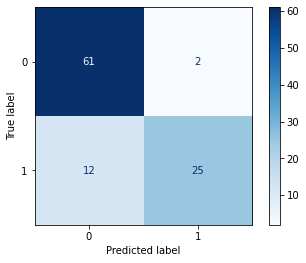

In [16]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=lr.classes_) # for the confusion matrix
conf_matrix.plot(cmap=plt.cm.Blues) # for the confusion matrix
plt.show() # for the confusion matrix

In [17]:
print(classification_report(y_test,pred)) # for the classification report

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



In [20]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test,pred))) # for the accuracy of our model


Accuracy: 0.86
